##### Variance Threshold is a simple yet effective filter-based feature selection method.
##### It removes features that have low variance.
#### Benefits for feature selection:
###### Features with very low variance (close to zero) often don't contribute much information to a model.
###### These features may be constant or nearly constant across samples, making them less useful for prediction.
###### Removing low variance features can simplify your model, reduce overfitting, and potentially improve performance.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest,SelectPercentile, VarianceThreshold
from sklearn.feature_selection import f_regression  # For regression tasks


In [12]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [13]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [14]:
# Store original column names
original_columns = X.columns

In [27]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.005)

In [28]:
X_new = selector.fit_transform(X, y)
X_new



array([[0.00000000e+00, 0.00000000e+00, 9.10801085e-02, ...,
        8.30169067e-02, 8.34394467e-02, 8.12283770e-02],
       [1.00000000e+00, 5.80571747e-06, 6.24611449e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.16114349e-05, 3.22643876e-02, ...,
        8.00678555e-02, 8.35312557e-02, 4.33562178e-02],
       ...,
       [1.72006000e+05, 9.99988389e-01, 1.64478816e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.72007000e+05, 9.99994194e-01, 3.48365591e-01, ...,
        4.84362715e-01, 4.84613516e-01, 4.84111914e-01],
       [1.72008000e+05, 1.00000000e+00, 9.63346961e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [32]:
# Get the selected feature names
selected_features = original_columns[selector.get_support()]
selected_variances = selector.variances_[selector.get_support()]

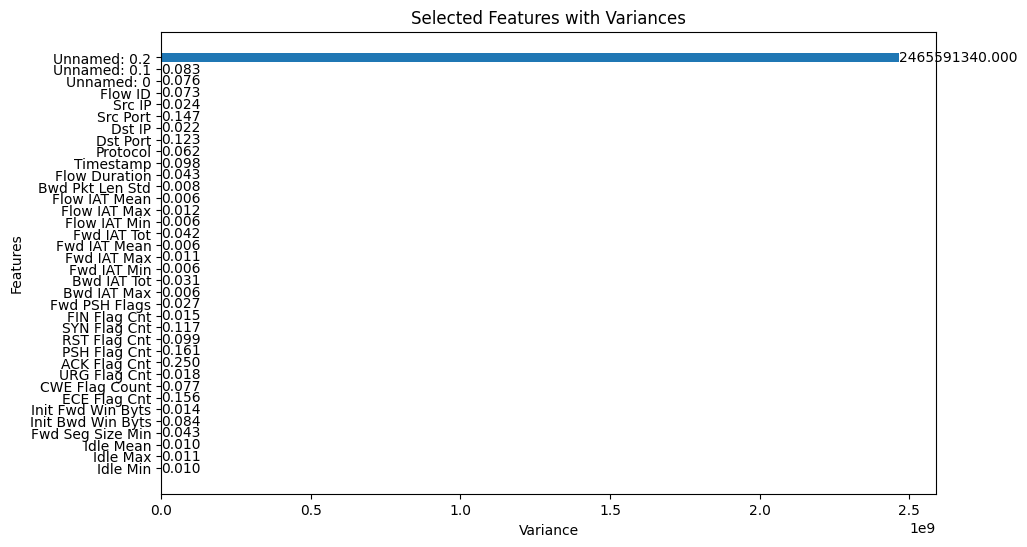

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(selected_features, selected_variances)
plt.xlabel('Variance')
plt.ylabel('Features')
plt.title('Selected Features with Variances')
plt.gca().invert_yaxis() 

# Add variance values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', ha='left')

plt.show()

In [34]:
# Identify dropped columns
dropped_columns = original_columns.difference(selected_features)

print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['Active Max', 'Active Mean', 'Active Min', 'Active Std',
       'Bwd Header Len', 'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std',
       'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Min', 'Bwd Pkts/s', 'Bwd Seg Size Avg', 'Down/Up Ratio',
       'Flow Byts/s', 'Flow IAT Std', 'Flow Pkts/s', 'Fwd Act Data Pkts',
       'Fwd Header Len', 'Fwd IAT Std', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Std', 'Fwd Pkts/s', 'Fwd Seg Size Avg',
       'Idle Std', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Min', 'Pkt Len Std',
       'Pkt Len Var', 'Pkt Size Avg', 'Subflow Bwd Byts', 'Subflow Bwd Pkts',
       'Subflow Fwd Byts', 'Subflow Fwd Pkts', 'Tot Bwd Pkts', 'Tot Fwd Pkts',
       'TotLen Bwd Pkts', 'TotLen Fwd Pkts'],
      dtype='object')


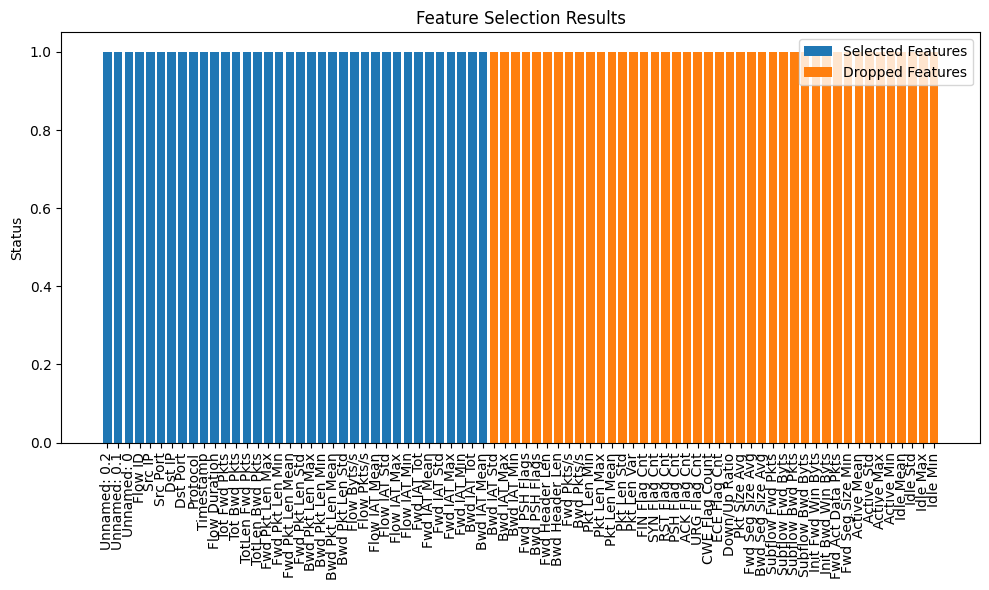

In [35]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), np.ones(len(selected_features)), label='Selected Features')
plt.bar(range(len(selected_features), len(original_columns)), np.ones(len(dropped_columns)), label='Dropped Features')
plt.xticks(range(len(original_columns)), original_columns, rotation=90)
plt.ylabel('Status')
plt.title('Feature Selection Results')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(selected_features)]]

(df_selected) 

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Mean,Idle Max,Idle Min
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.0,0.0,0.0,0.0,0.125015,0.474380,0.454545,0.083017,0.083439,0.081228
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.0,0.0,0.0,0.0,0.000000,0.007950,0.000000,0.080068,0.083531,0.043356
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,1.0,0.0,0.0,0.0,0.000000,0.003235,0.000000,0.000000,0.000000,0.000000
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.0,0.0,0.0,1.0,0.125015,0.959061,0.454545,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.0,0.0,1.0,1.0,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.0,0.0,1.0,1.0,0.000000,0.500015,0.000000,0.000000,0.000000,0.000000
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.0,0.0,0.0,1.0,0.125015,0.002701,0.454545,0.484363,0.484614,0.484112


In [37]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,172004,0.999977,0.241651,0.880275,0.300384,0.001221,0.328569,0.846522,0.352941,0.973918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172005,172005,0.999983,0.155045,0.172553,0.264819,0.806162,0.223591,0.000809,1.000000,0.820418,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
172006,172006,0.999988,0.164479,0.865995,0.300384,0.001221,0.328076,0.909101,0.352941,0.931253,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
172007,172007,0.999994,0.348366,0.360296,0.247997,0.783197,0.482011,0.006760,0.352941,0.861877,...,0.454545,0.003830,0.004991,0.006237,0.001424,0.484363,0.000647,0.484614,0.484112,1


In [38]:
df_selected.to_csv("VarianceThreshold.csv")